<a href="https://colab.research.google.com/github/AjeetParmar1/UkraineTwitterDataAnalysis/blob/main/BERT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import InputExample, InputFeatures
# from sklearn.model_selection import train_test_split

# Import the model and tokenizer from HuggingFace
# could use roberta-large
model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base")
tokenizer = AutoTokenizer.from_pretrained("roberta-base")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
model.summary()

Model: "tf_roberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLayer  multiple                 124055040 
 )                                                               
                                                                 
 classifier (TFRobertaClassi  multiple                 592130    
 ficationHead)                                                   
                                                                 
Total params: 124,647,170
Trainable params: 124,647,170
Non-trainable params: 0
_________________________________________________________________


In [5]:
!pwd
from google.colab import drive
drive.mount('/content/gdrive')


/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
dataset1 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/research_Ukraine/tweets_1.csv")
print(dataset1.size)
dataset1.head()

12000


,id_str,created_at,full_text,Stance Label,Verified,Notes
0,488064625087229952,2014-07-12 20:57:29,#Putin meets President Cristina #Kirchner in A...,Irrelevant,NaN,NaN
1,1250186480120745985,2020-04-14 22:17:38,Here's former Bush administration official tur...,Irrelevant,NaN,NaN
2,1262691931081105408,2020-05-19 10:29:50,TikTok contents -\n- Acid Attack \n- Violence\...,Irrelevant,NaN,NaN
3,1297881714383962116,2020-08-24 13:01:28,#THREAD\n\nTODAY I WILL REMOVE ALL MISUNDERSTA...,Irrelevant,NaN,NaN
4,1380479059704963075,2021-04-09 11:13:50,If you ever wondered what you’d do in Nazi Ger...,Irrelevant,NaN,NaN


In [7]:
dataset2 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/research_Ukraine/tweets_2.csv")
print(dataset2.size)
dataset2.head()

12000


,id_str,created_at,full_text,Stance Label,Unnamed: 4,Unnamed: 5
0,488064625087229952,2014-07-12 20:57:29,#Putin meets President Cristina #Kirchner in A...,Irrelevant,NaN,NaN
1,1250186480120745985,2020-04-14 22:17:38,Here's former Bush administration official tur...,Irrelevant,NaN,NaN
2,1262691931081105408,2020-05-19 10:29:50,TikTok contents -\n- Acid Attack \n- Violence\...,Irrelevant,NaN,NaN
3,1297881714383962116,2020-08-24 13:01:28,#THREAD\n\nTODAY I WILL REMOVE ALL MISUNDERSTA...,Irrelevant,NaN,NaN
4,1380479059704963075,2021-04-09 11:13:50,If you ever wondered what you’d do in Nazi Ger...,Irrelevant,NaN,NaN


In [8]:
dataset3 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/research_Ukraine/tweets_3.csv")
print(dataset3.size)
dataset3.head()

12000


,id_str,created_at,full_text,Stance Label,Unnamed: 4,Unnamed: 5
0,488064625087229952,2014-07-12 20:57:29,#Putin meets President Cristina #Kirchner in A...,Irrelevant,NaN,NaN
1,1250186480120745985,2020-04-14 22:17:38,Here's former Bush administration official tur...,Irrelevant,NaN,NaN
2,1262691931081105408,2020-05-19 10:29:50,TikTok contents -\n- Acid Attack \n- Violence\...,Irrelevant,NaN,NaN
3,1297881714383962116,2020-08-24 13:01:28,#THREAD\n\nTODAY I WILL REMOVE ALL MISUNDERSTA...,Irrelevant,NaN,NaN
4,1380479059704963075,2021-04-09 11:13:50,If you ever wondered what you’d do in Nazi Ger...,Irrelevant,NaN,NaN


In [9]:
dataset_tmp = pd.concat([dataset1, dataset2], axis=0).drop_duplicates().reset_index(drop=True)
dataset = pd.concat([dataset_tmp, dataset3], axis=0).drop_duplicates().reset_index(drop=True)
print(dataset.size)
dataset.head()
# dataset = dataset1

In [10]:
text = dataset["full_text"][0]
text

'#Putin meets President Cristina #Kirchner in Argentina, continuing six-day tour of #LatinAmerica @KremlinRussia_E http://t.co/oKVwKUIwwI'

In [11]:

#One hot encode the work
one_hot = pd.get_dummies(dataset["Stance Label"])
df = dataset.drop(["Stance Label", "Verified", "Notes", "Unnamed: 4", "Unnamed: 5", "created_at", "id_str"],axis = 1)
# df = dataset.drop(["Stance Label", "Verified", "Notes", "created_at", "id_str"],axis = 1)
df = df.join(one_hot)
df.head()

,full_text,Irrelevant,Neutral,ProRussia,ProUkraine
0,#Putin meets President Cristina #Kirchner in A...,1,0,0,0
1,Here's former Bush administration official tur...,1,0,0,0
2,TikTok contents -\n- Acid Attack \n- Violence\...,1,0,0,0
3,#THREAD\n\nTODAY I WILL REMOVE ALL MISUNDERSTA...,1,0,0,0
4,If you ever wondered what you’d do in Nazi Ger...,1,0,0,0


In [12]:
# train, validate, test = np.split(df.sample(frac=1, random_state=42),
#                        [int(.6*len(df)), int(.8*len(df))])
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
get_available_gpus()

['/device:GPU:0']

In [13]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN):
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN],
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN],
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train,
                                                                           test,
                                                                           'DATA_COLUMN',
                                                                           'LABEL_COLUMN')

def convert_examples_to_tf_dataset(examples, tokenizer):
    features = [] # -> will hold InputFeatures to be converted later

    # find minimum size needed to avoid truncation (if possible)
    tokenized_examples = [tokenizer.encode(e.text_a) for e in examples]
    max_example_len = max([len(e) for e in tokenized_examples])
    max_length = min(max_example_len, tokenizer.model_max_length)

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer(
            e.text_a,
            padding="max_length",
            max_length=max_length,
            truncation=True,
        )

        input_ids, attention_mask = (input_dict["input_ids"],
           input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
        for f in features:
            item = (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )
            yield item

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'full_text'
LABEL_COLUMN = 'ProUkraine'

In [14]:
from sklearn.model_selection import train_test_split

# model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base")
# tokenizer = AutoTokenizer.from_pretrained("roberta-base")

train, test = train_test_split(df, test_size=0.3)

train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(len(train_InputExamples), seed=2023, reshuffle_each_iteration=True).batch(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(2)


In [51]:


model_unfiltered = model
model_unfiltered.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

history_unfiltered = model_unfiltered.fit(train_data, epochs=4, validation_data=validation_data)

Epoch 1/4


KeyboardInterrupt: ignored

In [50]:
pred_sentences = ['Ukraine will win. Slava Ukraini', 'Russia will win', "Putin is a hero against the expansion of NATO", "Selensky"]
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['ProUkraine','ProRussia']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
    print(pred_sentences[i], ": \n", labels[label[i]])
    # print(tf_predictions[i])

Ukraine will win. Slava Ukraini : 
 ProRussia
Russia will win : 
 ProRussia
Putin is a hero against the expansion of NATO : 
 ProRussia
Zelensky is an American puppet supporting Nazism in Ukraine : 
 ProRussia
Heroyam Slava : 
 ProRussia


In [20]:
# list all data in history
# print(history.history.keys())
history_unfiltered.history['accuracy']

[0.7621428370475769,
 0.7549999952316284,
 0.7971428632736206,
 0.8628571629524231]

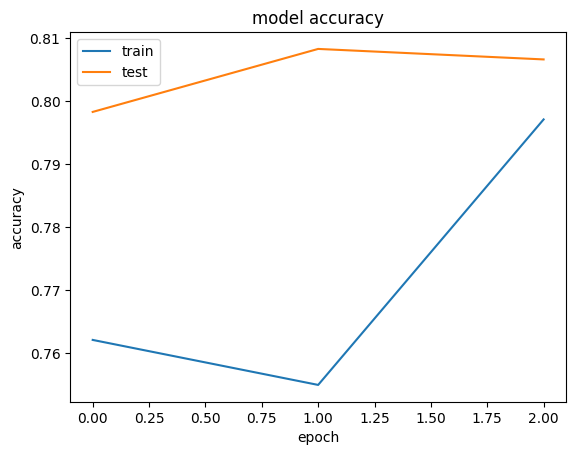

In [22]:
# summarize history for accuracy
plt.plot(history_unfiltered.history['accuracy'])
plt.plot(history_unfiltered.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

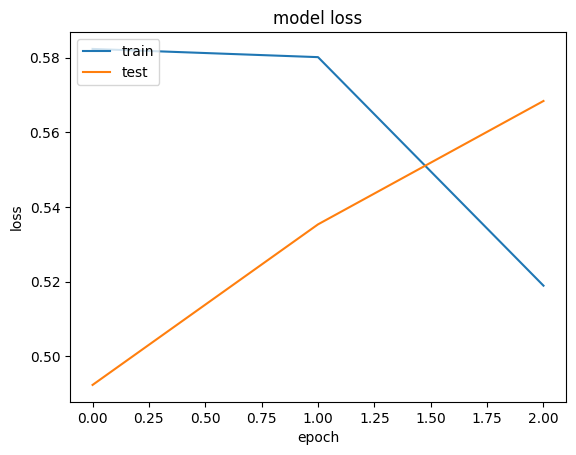

In [24]:
# summarize history for loss
plt.plot(history_unfiltered.history['loss'])
plt.plot(history_unfiltered.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [ ]:
# train, test = train_test_split(df, test_size=0.3)

# model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base")
# tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

# train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
# train_data = train_data.shuffle(len(train_InputExamples), seed=42, reshuffle_each_iteration=True).batch(2)

# validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
# validation_data = validation_data.batch(2)

# model_unfiltered = model
# model_unfiltered.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-08, clipnorm=1.0),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

# history_unfiltered_40 = model_unfiltered.fit(train_data, epochs=5, validation_data=validation_data)

In [ ]:
# list all data in history
# print(history.history.keys())
import matplotlib.pyplot as plt

In [ ]:
# # summarize history for accuracy
# plt.plot(history_unfiltered_40.history['accuracy'])
# plt.plot(history_unfiltered_40.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
# # summarize history for loss
# plt.plot(history_unfiltered_40.history['loss'])
# plt.plot(history_unfiltered_40.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base")
tokenizer = AutoTokenizer.from_pretrained("roberta-base")



In [42]:
# Filter the dataset for values only for pro russia or pro Ukraine
dataset_tmp = pd.concat([dataset1, dataset2], axis = 0).drop_duplicates().reset_index(drop=True)
dataset = pd.concat([dataset_tmp, dataset3], axis = 0).drop_duplicates().reset_index(drop=True)
# dataset = dataset1
one_hot = pd.get_dummies(dataset["Stance Label"])
df = dataset.drop(["Stance Label", "Verified", "Notes", "created_at", "id_str"],axis = 1)
# df = dataset.drop(["Stance Label", "created_at", "id_str", "Unnamed: 4", "Unnamed: 5"],axis = 1)
df = df.join(one_hot)
df.head()
# df.drop(df.loc[df['Irrelevant'] == 1])

,full_text,Unnamed: 4,Unnamed: 5,Irrelevant,Neutral,ProRussia,ProUkraine
0,#Putin meets President Cristina #Kirchner in A...,NaN,NaN,1,0,0,0
1,Here's former Bush administration official tur...,NaN,NaN,1,0,0,0
2,TikTok contents -\n- Acid Attack \n- Violence\...,NaN,NaN,1,0,0,0
3,#THREAD\n\nTODAY I WILL REMOVE ALL MISUNDERSTA...,NaN,NaN,1,0,0,0
4,If you ever wondered what you’d do in Nazi Ger...,NaN,NaN,1,0,0,0


In [43]:
df.loc[df['Irrelevant'] == 1]
df.drop(df[(df['Irrelevant'] == 1) & (df['Neutral'] == 1)].index, inplace=True)
df.drop(df[(df['Irrelevant'] == 1)].index, inplace=True)
df.drop(df[(df['Neutral'] == 1)].index, inplace=True)
df = df.drop(['Irrelevant', 'Neutral'], axis=1)
df.head()
# df.size

,full_text,Unnamed: 4,Unnamed: 5,ProRussia,ProUkraine
6,@WrestlingWombat @HStefansonMB What is happeni...,NaN,NaN,0,1
8,Today on the campaign trail I had some tough c...,NaN,NaN,0,1
11,By now over a thousand refugees from #Ukraine ...,NaN,NaN,0,1
13,Whoever is coming up with reactive strategy by...,NaN,NaN,1,0
14,He also writes about the possibility of Ukrain...,NaN,NaN,0,1


In [45]:
from sklearn.model_selection import train_test_split

model = TFAutoModelForSequenceClassification.from_pretrained("roberta-large")
tokenizer = AutoTokenizer.from_pretrained("roberta-large")


train, test = train_test_split(df, test_size=0.3)

train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(len(train_InputExamples), seed=2023, reshuffle_each_iteration=True).batch(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(2)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

history_filtered = model.fit(train_data, epochs= 4, validation_data=validation_data)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/4
488/488 [==============================] - 420s 612ms/step - loss: 0.7237 - accuracy: 0.5641 - val_loss: 0.7229 - val_accuracy: 0.5847
Epoch 2/4
488/488 [==============================] - 263s 540ms/step - loss: 0.7090 - accuracy: 0.5846 - val_loss: 0.6761 - val_accuracy: 0.5847
Epoch 3/4
 49/488 [==>...........................] - ETA: 3:37 - loss: 0.6972 - accuracy: 0.5510

KeyboardInterrupt: ignored

In [ ]:
# # train, test = train_test_split(df, test_size=0.3)

# train, test = train_test_split(df, test_size=0.4)

# train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
# train_data = train_data.shuffle(len(train_InputExamples), seed=42, reshuffle_each_iteration=True).batch(2)

# validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
# validation_data = validation_data.batch(2)

# model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base")
# tokenizer = AutoTokenizer.from_pretrained("roberta-base")


# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

# history_filtered = model.fit(train_data, epochs= 4, validation_data=validation_data)

In [ ]:
# summarize history for accuracy
plt.plot(history_filtered.history['accuracy'])
plt.plot(history_filtered.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history_filtered.history['loss'])
plt.plot(history_filtered.history['val_loss'])
plt.title('Model Loss for Filtered Dataset with 7 Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])#, loc='upper left')
plt.show()

In [ ]:
pred_sentences = ['Ukraine will win against Russia. Slava Ukraini', 'Russia will win against Ukraine and defeat the Ukrainian Nazis']
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['ProRussia','ProUkraine']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
    print(pred_sentences[i], ": \n", labels[label[i]])
    # print(tf_predictions[i])

In [ ]:
# train, test = train_test_split(df, test_size=0.3)

# train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

# train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
# train_data = train_data.shuffle(len(train_InputExamples), seed=42, reshuffle_each_iteration=True).batch(2)

# validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
# validation_data = validation_data.batch(2)

# # model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

# history_filtered = model.fit(train_data, epochs=3, validation_data=validation_data)

In [ ]:
# plt.plot(history_filtered.history['accuracy'])
# plt.plot(history_filtered.history['val_accuracy'])
# plt.title('Model Accuracy for Filtered Dataset with 7 Epochs')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'test'])#, loc='upper left')
# plt.show()

In [ ]:
# summarize history for loss
# plt.plot(history_filtered.history['loss'])
# plt.plot(history_filtered.history['val_loss'])
# plt.title('Model Loss for Filtered Dataset with 7 Epochs')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'test'])#, loc='upper left')
# plt.show()

In [ ]:
# plt.plot(np.subtract(history.history['val_loss'], history.history['loss']))
# plt.title('Generalization Gap for Filtered Dataset with 7 Epochs')
# plt.ylabel('Generalization Gap')
# plt.xlabel('Epoch')

In [47]:
!python --version

Python 3.10.12
